<h1>Курсовая работа по уравнениям математической физики</h1>

<p>Разработать программу расчета на промежутке времени $0 < t \leq T$ малых поперечных колебаний тонкой однородной струны с жестко закрепленными концами $x=0$ и $x=l$. Колебания возбуждаются непрерывно распределенной по струне и перпендикулярной к ней силой плотностью</p>
$$\varphi(x,t) = \alpha(x)\sin\omega t, 0 \leq x \leq l, 0 \leq t \leq T$$

<p>Реакция окружающей среды пренебрежимо мала.</p>
<p>Начальные скорости точек струны равны нулю. Линейная плотность тсруны и величина натяжения, возникающего в струне в процессе колебаний равны $\rho$ и $\eta$ соответственно.</p>

<p>Для получения аналитической формы решения описанной задачи математической физики применить метод разделения переменных.</p>

<p>Для проведения расчетов использовать представление решения задачи в виде ряда Фурье по собственным функциям опреатора Лапласа, удовлетворяющим соответствующим краевым условиям.</p>

In [1]:
from math import sin, cos, pi, floor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l = 20
ro = 2
eta = 1
w = 2

a = (eta/ro)**0.5


In [3]:
def Yn(x,n):
    return sin(pi*n*x/l)

In [4]:
def u_calc(x, t):
    res = 0
    for n in range(1,1000):
        k = -2/ro*((cos(3*pi*n/4)-cos(pi*n/4)) / (pi*n))
        wn = a * pi * n / l
        #den = (pi*n*a)**2 - (l*w)**2
        #res += ((k*l**2*sin(w*t))/den - (k*l**3*w)/(pi*n*a*den)*sin(a*n*pi*t/l))*Yn(x,n)
        den = wn*(wn**2 - w**2)
        res += (k*(wn*sin(w*t)-w*sin(wn*t)) / den) * Yn(x,n)
    return res

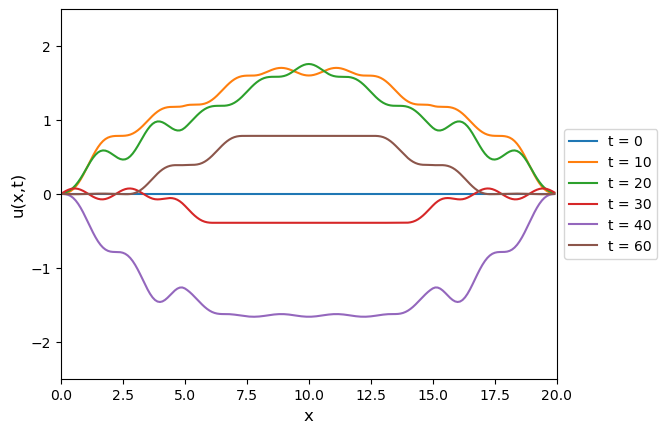

In [5]:
lx = []
lt1, lt2, lt3, lt4, lt5, lt6 = [], [], [], [], [], []
t1, t2, t3, t4, t5, t6 = 0, 10, 20, 30, 40, 60

for x in np.arange(0, 20, 0.1):
    u = u_calc(x, t1)
    lt1.append(u)
    u = u_calc(x, t2)
    lt2.append(u)
    u = u_calc(x, t3)
    lt3.append(u)
    u = u_calc(x, t4)
    lt4.append(u)
    u = u_calc(x, t5)
    lt5.append(u)
    u = u_calc(x, t6)
    lt6.append(u)
    
    lx.append(x)

plt.axis([0,20,-2.5,2.5])
plt.plot(lx, lt1, label='t = 0')  
plt.plot(lx, lt2, label='t = 10')  
plt.plot(lx, lt3, label='t = 20')  
plt.plot(lx, lt4, label='t = 30')  
plt.plot(lx, lt5, label='t = 40')  
plt.plot(lx, lt6, label='t = 60') 
plt.xlabel("x", fontsize='large')
plt.ylabel("u(x,t)", fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



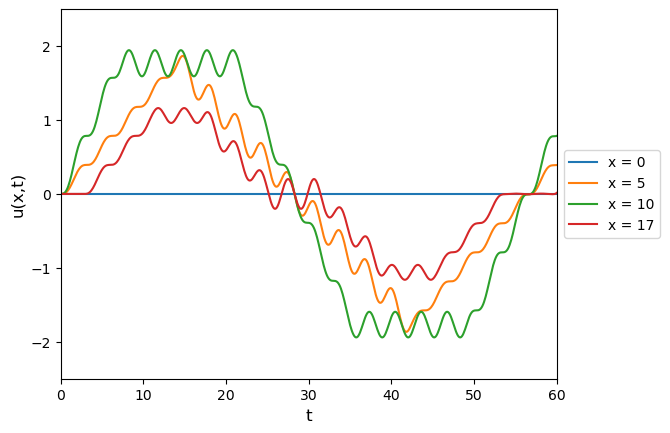

In [6]:
lt = []
lu1, lu2, lu3, lu4 = [], [], [], [],
x1, x2, x3, x4 = 0, 5, 10, 17
for t in np.arange(0, 61, 0.1):
    u = u_calc(x1, t)
    lu1.append(u)
    u = u_calc(x2, t)
    lu2.append(u)
    u = u_calc(x3, t)
    lu3.append(u)
    u = u_calc(x4, t)
    lu4.append(u)

    
    lt.append(t)

plt.axis([0,60,-2.5,2.5])
plt.plot(lt, lu1, label='x = 0')
plt.plot(lt, lu2, label='x = 5')
plt.plot(lt, lu3, label='x = 10')
plt.plot(lt, lu4, label='x = 17')
plt.xlabel("t", fontsize='large')
plt.ylabel("u(x,t)", fontsize='large')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
def ocenka():
    res = []
    for e in (0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001):
        n = (l**2/(pi**3*a**2*e))**0.5
        res.append((e, floor(n)))
    for i in res:
        print(i)
    

In [9]:
ocenka()

(0.01, 50)
(0.001, 160)
(0.0001, 507)
(1e-05, 1606)
(1e-06, 5079)
(1e-07, 16062)
(1e-08, 50794)


In [10]:
2**0.5*l**2/(pi**3*a**2)

36.488445922218865

In [10]:
def u_calc_n(x, t, n_gen):
    res = 0
    for n in range(1,n_gen+1):
        k = -2/ro*((cos(3*pi*n/4)-cos(pi*n/4)) / (pi*n))
        wn = a * pi * n / l
        #den = (pi*n*a)**2 - (l*w)**2
        #res += ((k*l**2*sin(w*t))/den - (k*l**3*w)/(pi*n*a*den)*sin(a*n*pi*t/l))*Yn(x,n)
        den = wn*(wn**2 - w**2)
        res += (k*(wn*sin(w*t)-w*sin(wn*t)) / den) * Yn(x,n)
    return res

In [11]:
e = 0.000001
n = 5079
R = u_calc_n(10, 10, n)
n = n - 1
u = u_calc_n(10, 10, n)
while abs(R - u) <= e:
    n = n - 1
    u = u_calc_n(10, 10, n)
print(n) #количество членов суммы ряда для достижения заданной точности

324
